In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
import scipy
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
a=df.pop('Happiness Score')

In [4]:
df.insert(11,'Happiness Score',a)

In [5]:
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [6]:
df.shape

(158, 12)

In [7]:
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [8]:
df.tail()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905
157,Togo,Sub-Saharan Africa,158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2.839


In [9]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Happiness Score']

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

 Obs: There are no null values in the dataset. The datatype for 2 columns is object,1 column is integer and 9 columns are float datatype. Since we have to predict insurance cost, charges will be out target varaible with datatype as float.
 Also the total number of rows in this dataset is 158. Since Country is unique for every row and it does not add any substantial statistical info, we can convert country column into index.

In [13]:
df.set_index("Country",inplace=True)
df

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Country,,,,,,,,,,,
Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006


<Axes: ylabel='Country'>

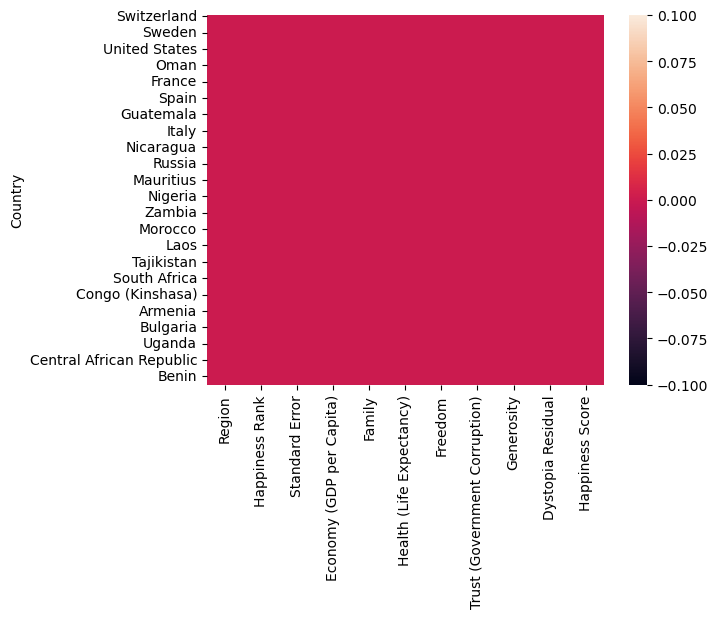

In [14]:
sns.heatmap(df.isnull())

Here we can see clearly that there are no null values in the dataset

In [15]:
df.nunique().to_frame()

,0
Region,10
Happiness Rank,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158
Dystopia Residual,158


Obs: Above we can see the number of unique values in each column.All the columns have almost no unque value except region

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


As we can see that the count is 158 in all the columns. Mean is greater than median in Happiness Score, Dystopia Residual,Generosity,Trust and Standard error which signifies right skewness while median is greater than mean in Happiness Rank,Economy,Family,Freedom which signifies left skewness.
Also


DATA VISUALIZATION

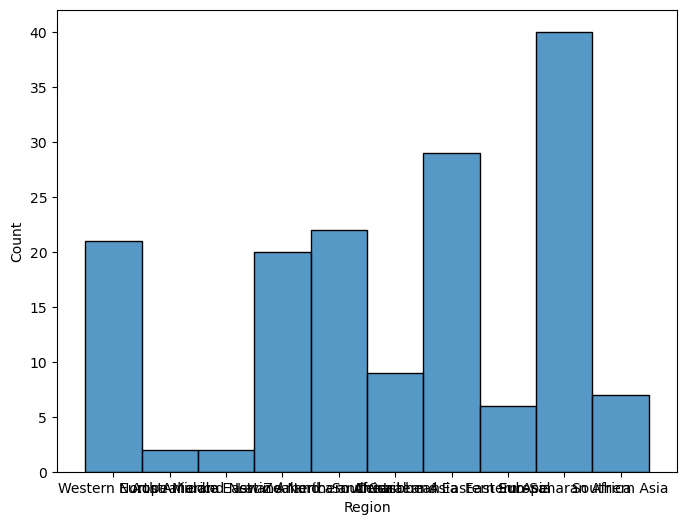

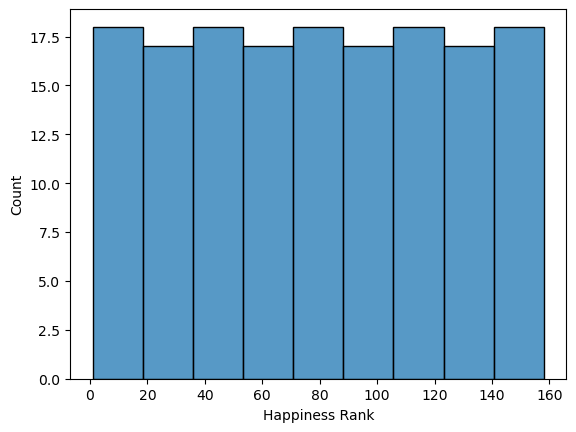

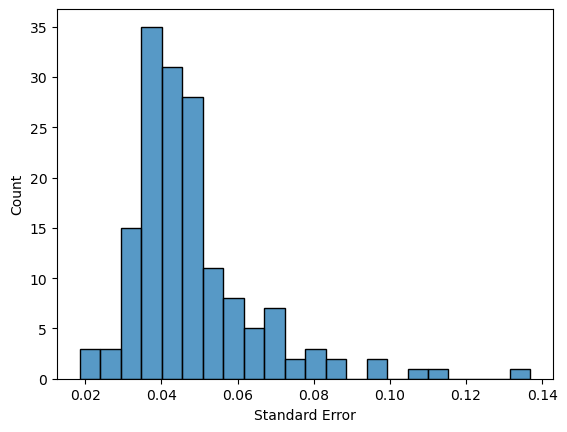

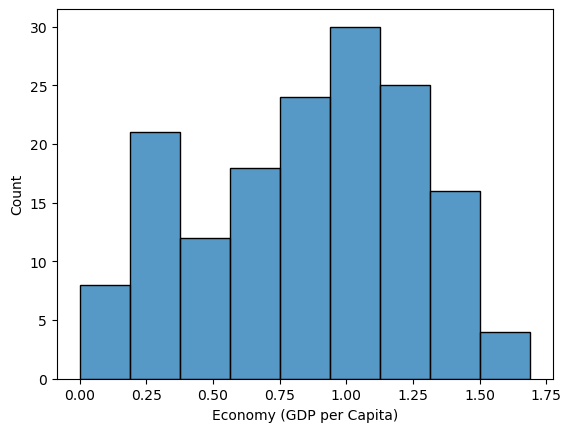

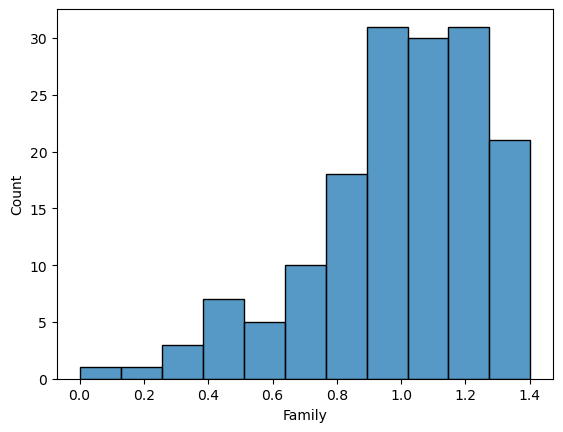

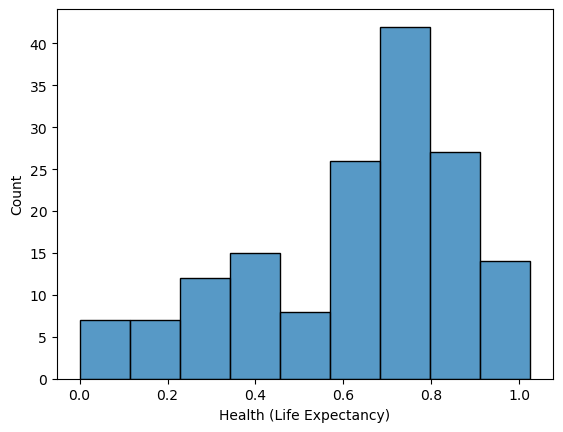

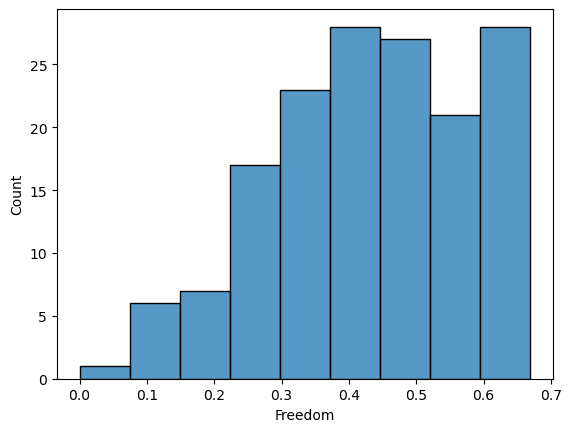

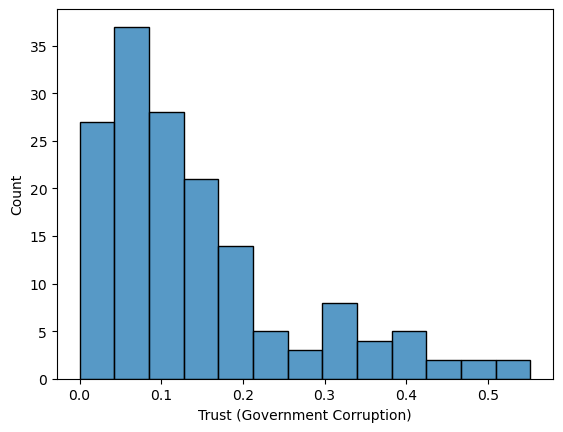

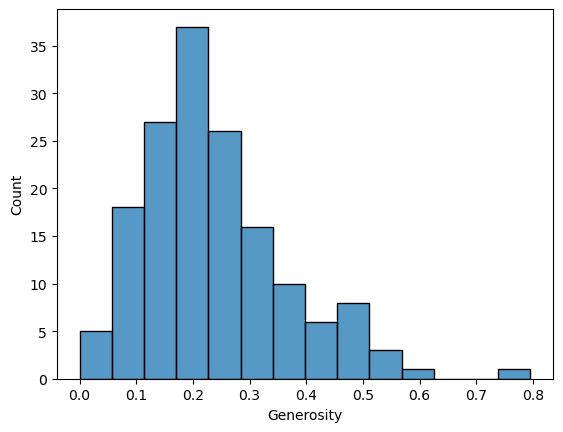

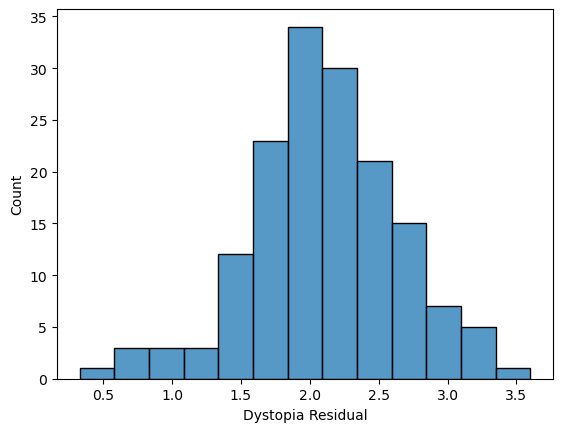

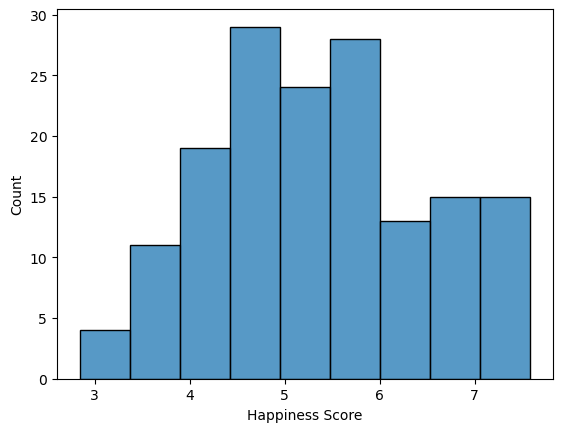

In [18]:
plt.figure(figsize=(8,6))
z=1
for i in df:
    if z<=11:
        sns.histplot(x=i,data=df)
        plt.show()
        z+=1

above histograms show the concentration of data. We can see Trust,generosity and standard error are right skewed and family, health, freedom and dystopia value is left skewed

In [19]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical=[]
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print("Categorical Columns :",categorical)
print("Numerical Columns :",numerical)
        

Categorical Columns : ['Region']
Numerical Columns : ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Happiness Score']


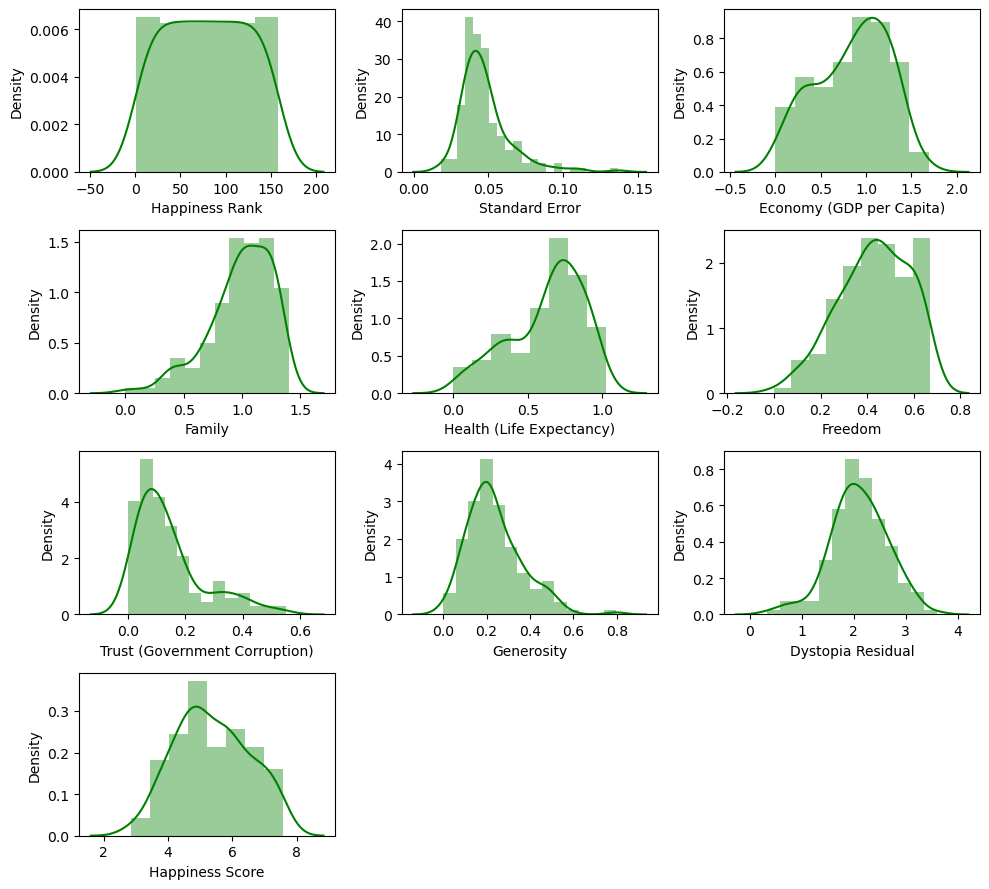

In [20]:
plt.figure(figsize=(10,9))
plotnumber=1
for col in numerical:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above distribution plots show that Happiness rank is normally distributed while Standard Error, Trust and Generosity are right skewed while Family, Health, Freedom and Dustopia Residual are left skewed. Happiness score is almost normally distributed.

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


<Axes: xlabel='count', ylabel='Region'>

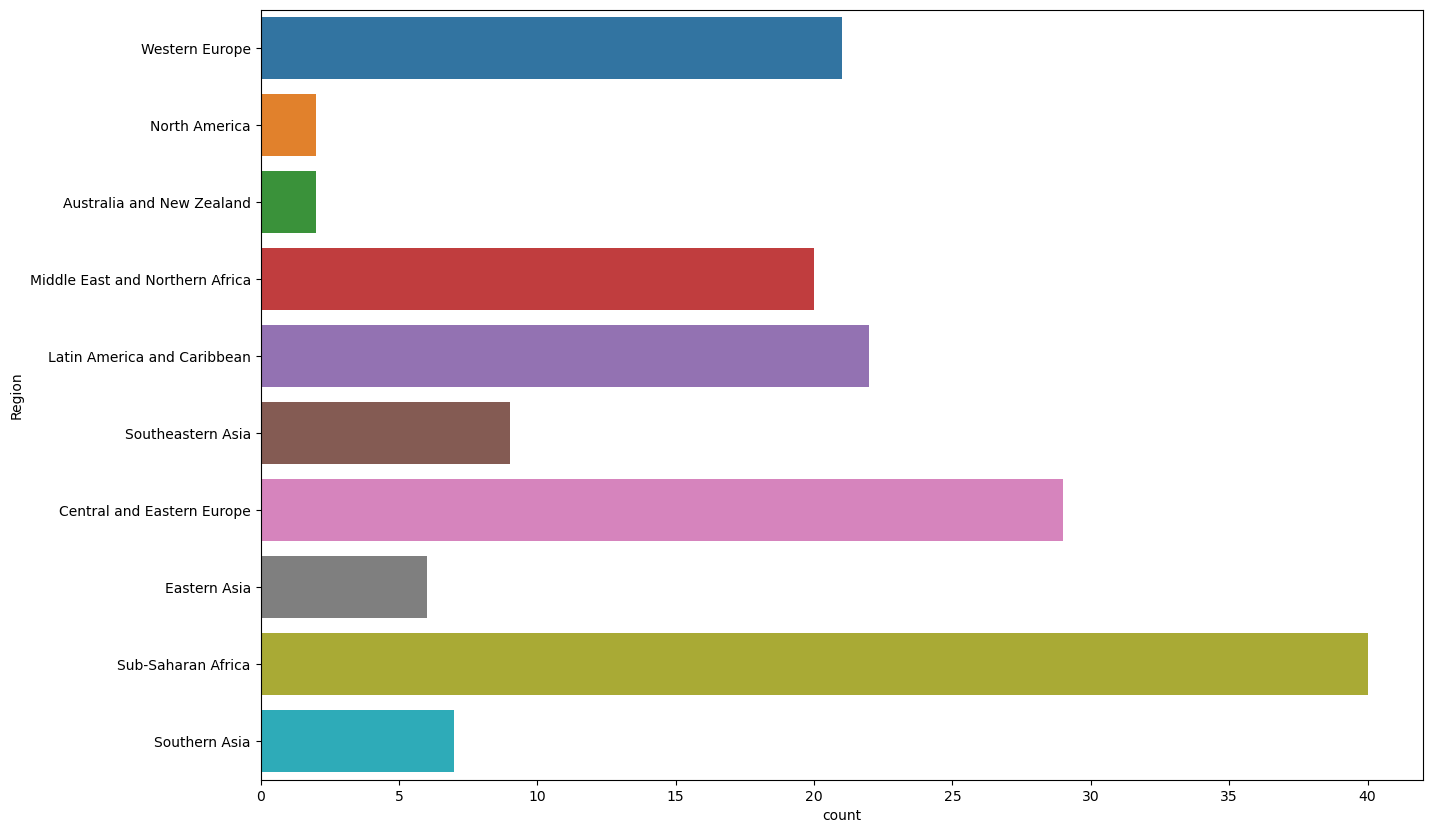

In [21]:
print(df['Region'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(y='Region',data=df)

Above we can see the value count in dataset region wise. As we can see there are almost same number of people in dataset from each region.Sub Saharan Africa has highest number of countries listed in happiness index though they are on the lower side of the index.

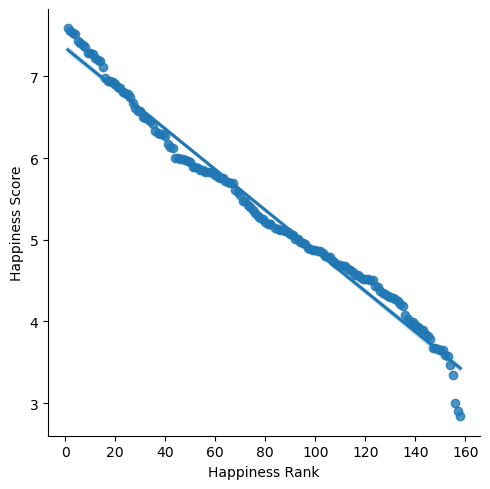

In [22]:
#LMPLOT
sns.lmplot(x='Happiness Rank',y='Happiness Score',data=df)

From the above graph we  can see higher the happiness score lesser the rank which is good but it does not tells us anything about happiness score and as per the graph is neagtively correlated. hence we would be dropping rank column

In [23]:
df.drop("Happiness Rank",axis=1,inplace=True)

In [24]:
df

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Country,,,,,,,,,,
Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006


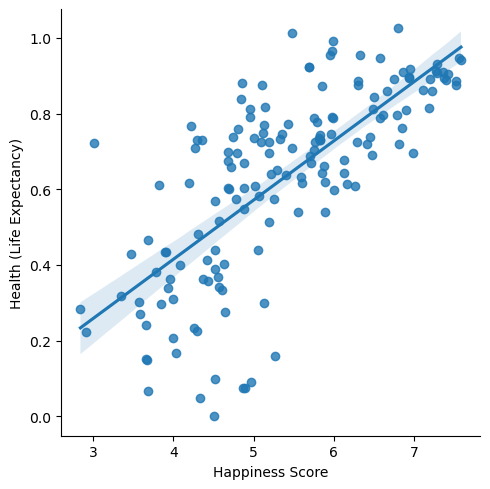

In [25]:

sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

Here we can see by above lm plot that happiness score and Health are positively correlated.

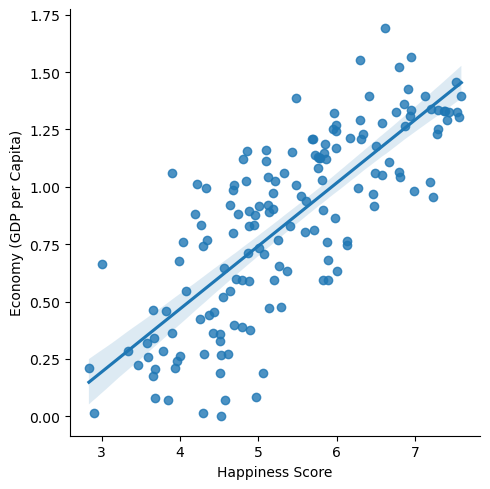

In [26]:
sns.lmplot(y='Economy (GDP per Capita)',x='Happiness Score',data=df)

Here we can see by above lm plot that happiness score and Economy are positively correlated.

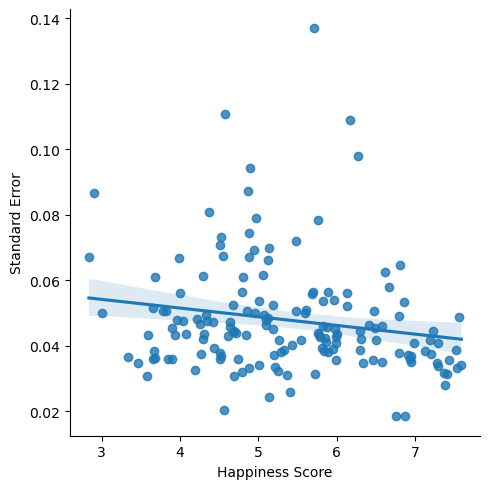

In [27]:
sns.lmplot(y='Standard Error',x='Happiness Score',data=df)

Happiness score is high when standard error is almost same

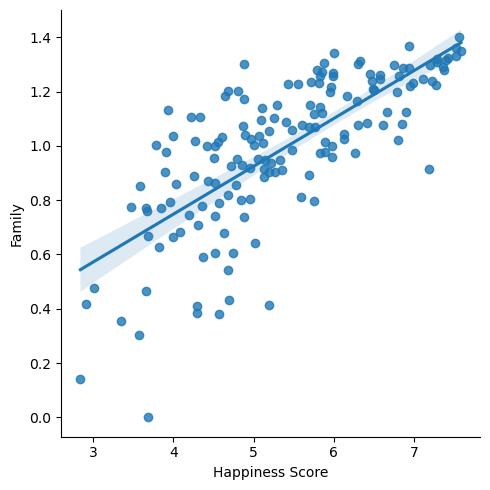

In [28]:
sns.lmplot(y='Family',x='Happiness Score',data=df)

Happiness score increases with incres in Family column. Same can be seen with the regression line

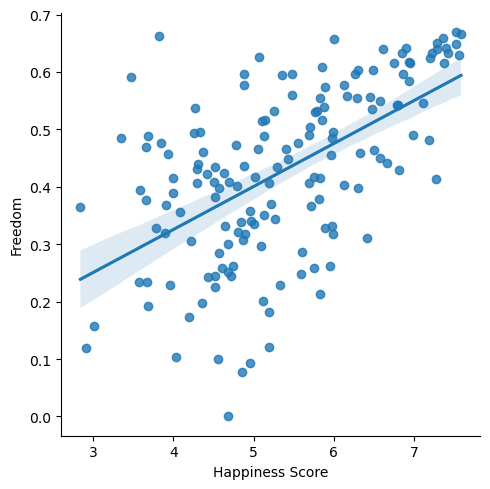

In [29]:
sns.lmplot(y='Freedom',x='Happiness Score',data=df)

Happiness score increases with incres in Freedom column. Same can be seen with the regression line

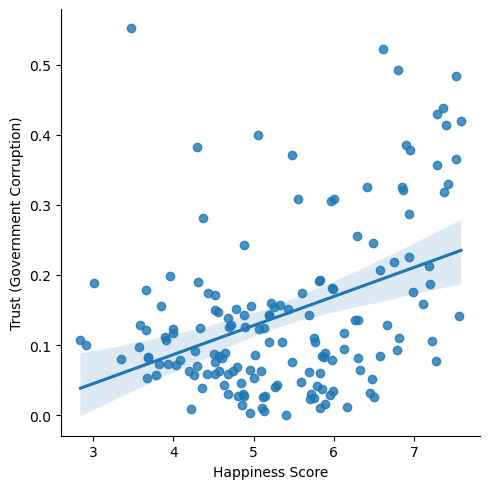

In [30]:
sns.lmplot(y='Trust (Government Corruption)',x='Happiness Score',data=df)

As we can see higher happiness score is where corruption is less

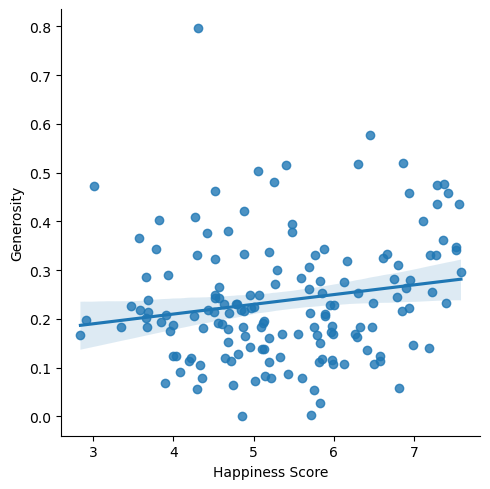

In [31]:
sns.lmplot(y='Generosity',x='Happiness Score',data=df)

happiness score is more where generosity is somewhat constant

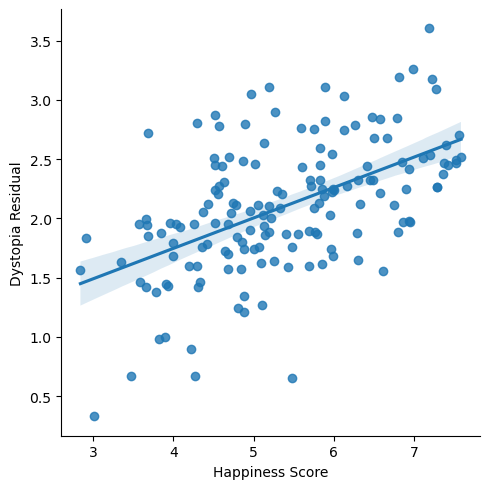

In [32]:
sns.lmplot(y='Dystopia Residual',x='Happiness Score',data=df)

Happiness score and Dystopia residual are positively correlated

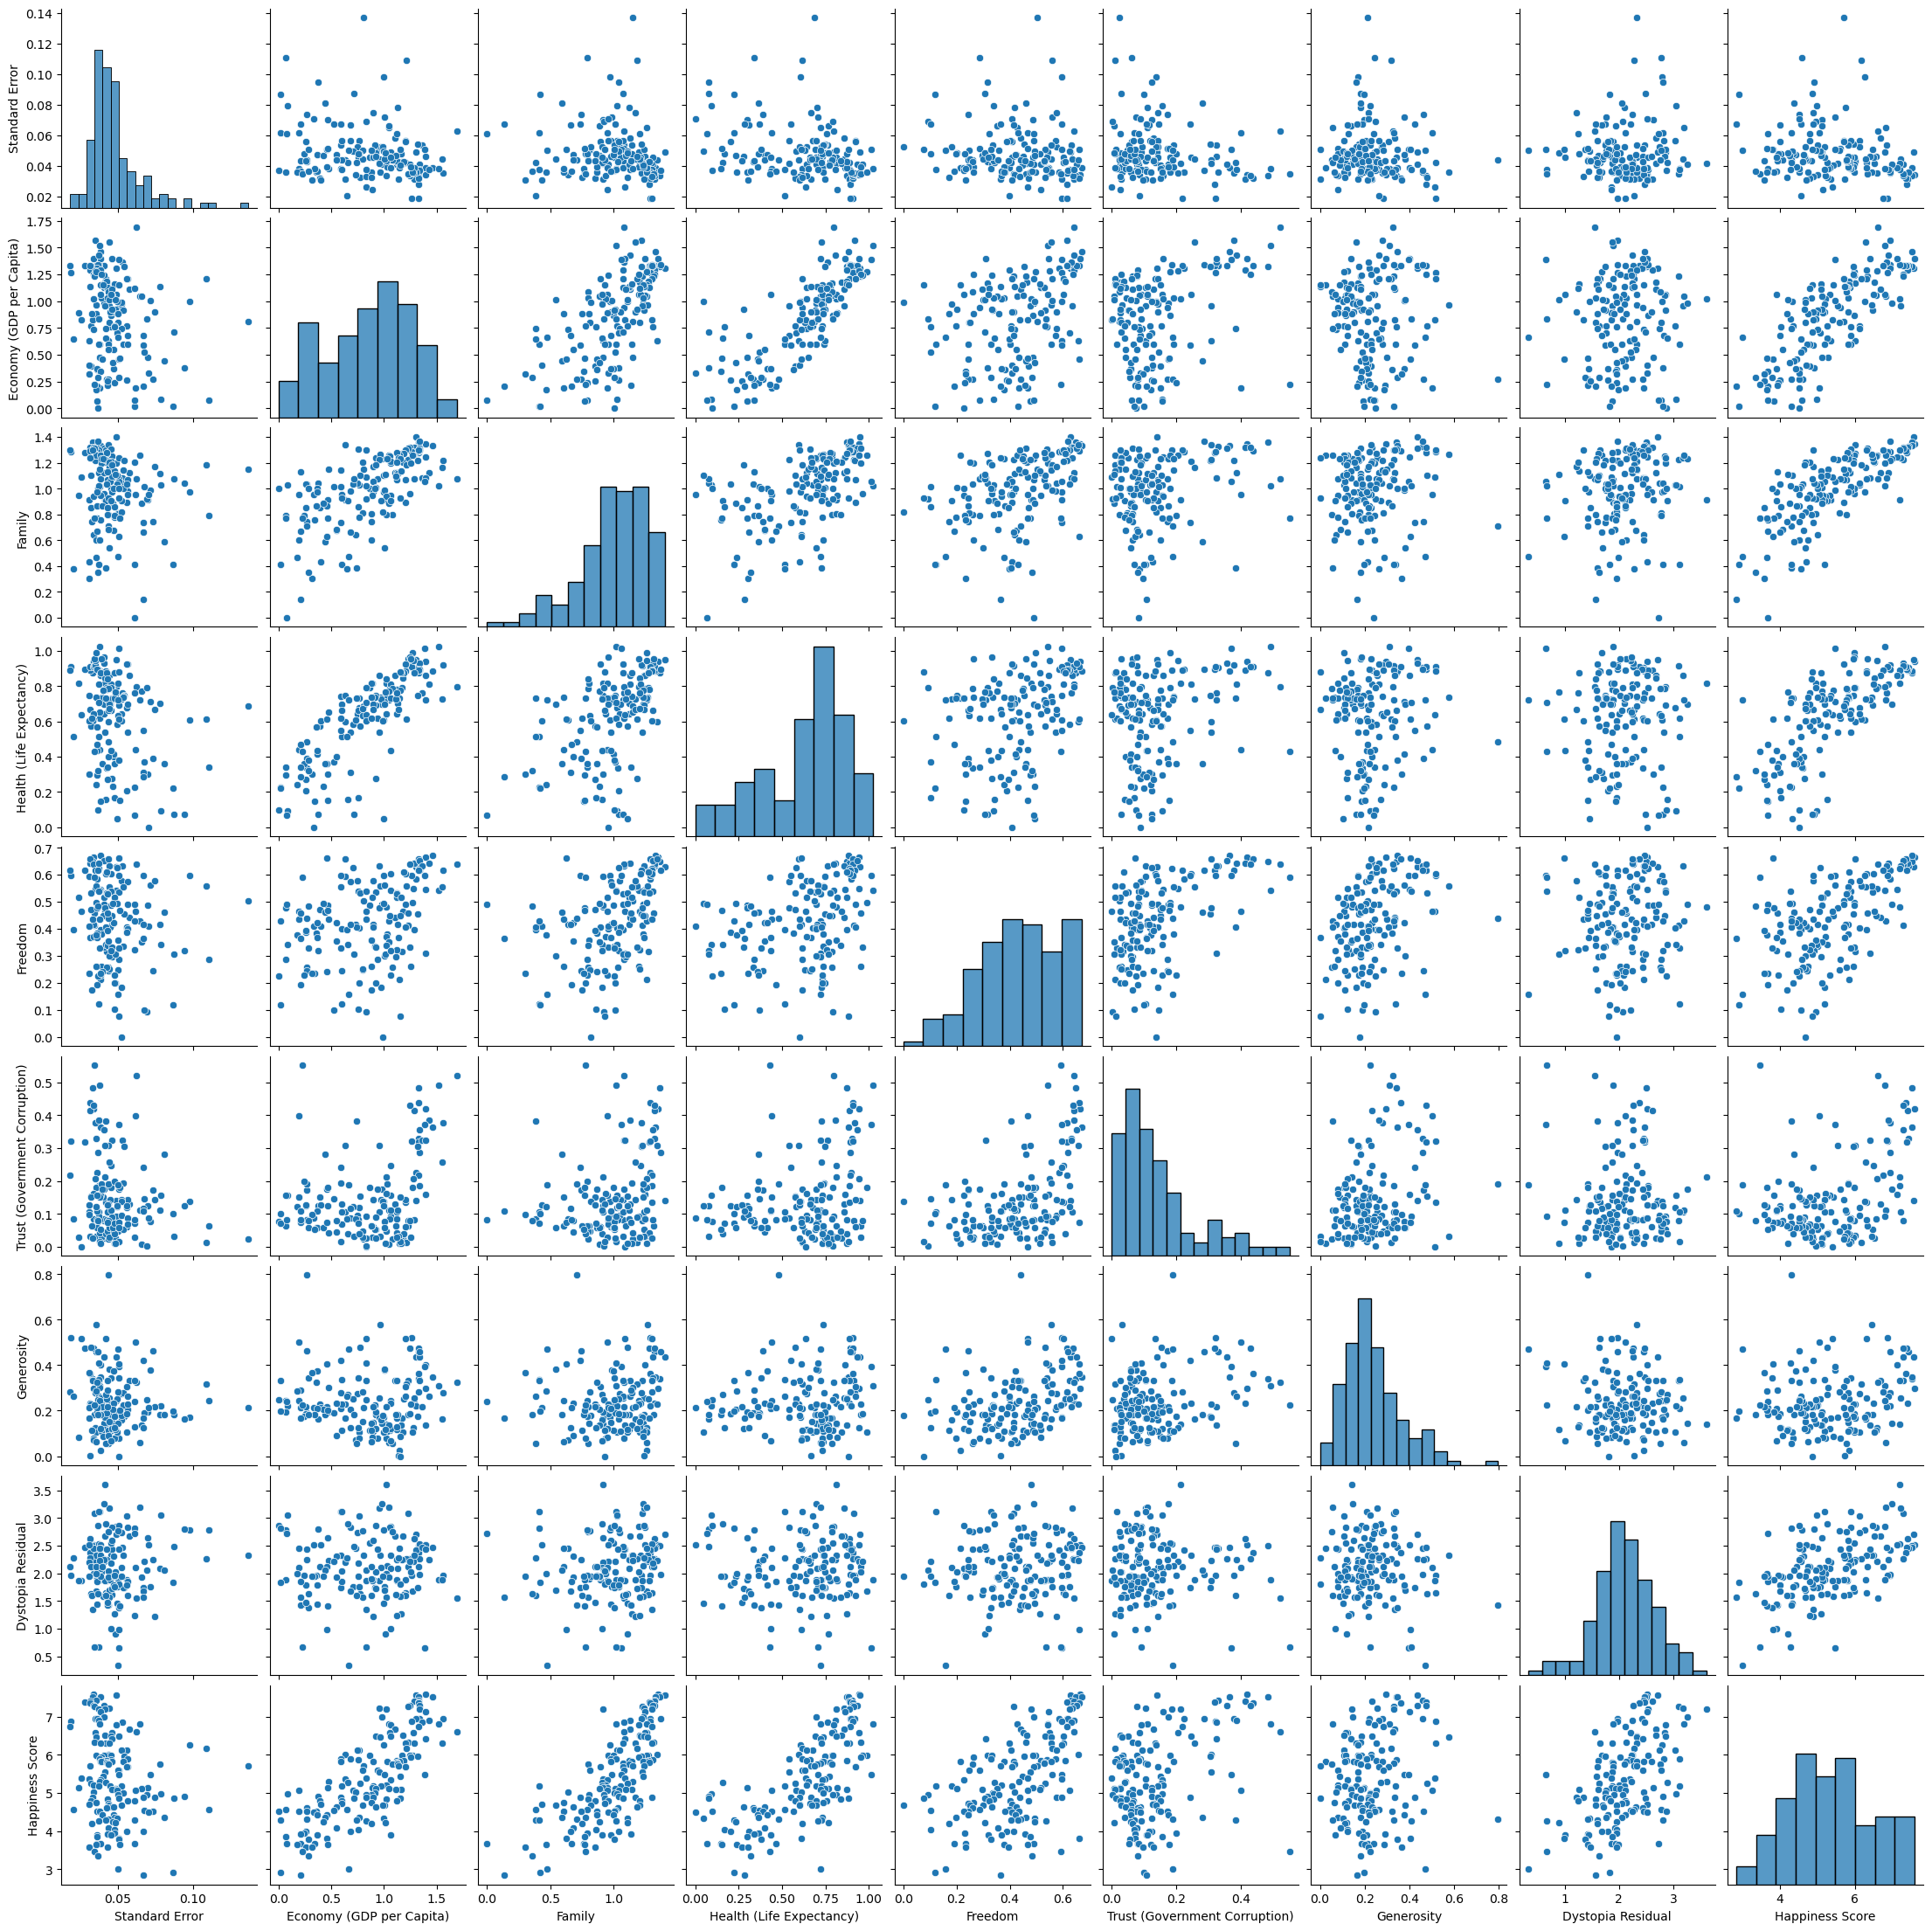

In [33]:
sns.pairplot(data=df)

From above pairplot we can se
Economy and health, economy and Family, Family and health, Family and freedom have positive correlation with each other

Standard Error                      Axes(0.125,0.712609;0.227941x0.167391)
Economy (GDP per Capita)         Axes(0.398529,0.712609;0.227941x0.167391)
Family                           Axes(0.672059,0.712609;0.227941x0.167391)
Health (Life Expectancy)            Axes(0.125,0.511739;0.227941x0.167391)
Freedom                          Axes(0.398529,0.511739;0.227941x0.167391)
Trust (Government Corruption)    Axes(0.672059,0.511739;0.227941x0.167391)
Generosity                           Axes(0.125,0.31087;0.227941x0.167391)
Dystopia Residual                 Axes(0.398529,0.31087;0.227941x0.167391)
Happiness Score                   Axes(0.672059,0.31087;0.227941x0.167391)
dtype: object

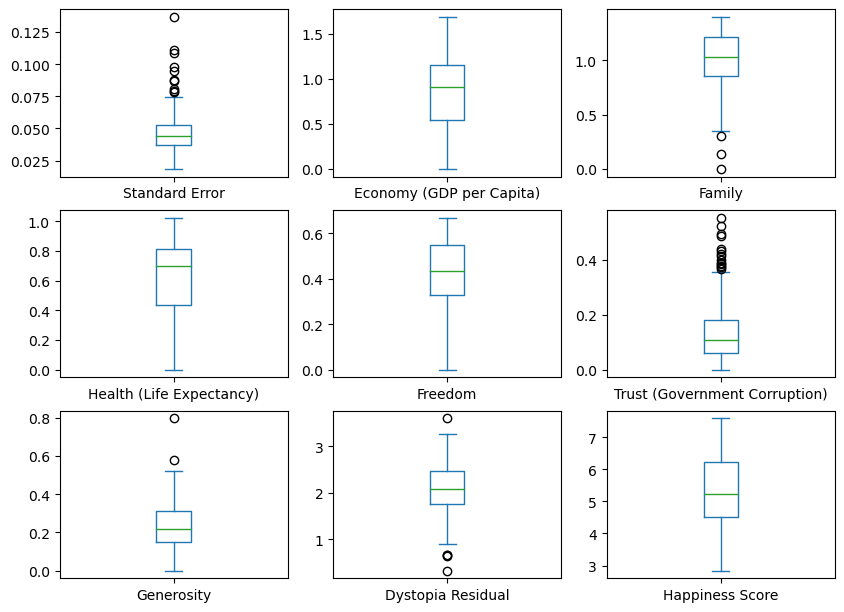

In [34]:
# box plot
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

Above box plot shows the presence of outliers in standard error, Trust majorly

In [35]:
#removing outliers 
z=np.abs(zscore(df[['Trust (Government Corruption)','Standard Error']]))
z

,Trust (Government Corruption),Standard Error
Country,,
Switzerland,2.309652,0.805926
Iceland,0.016480,0.055889
Denmark,2.842774,0.854487
Norway,1.852081,0.531526
Canada,1.555725,0.722845
...,...,...
Rwanda,3.413922,0.774917
Benin,0.529210,0.662582
Syria,0.381419,0.132534


In [36]:
np.where(z>3)

(array([ 27,  40,  64, 115, 153], dtype=int64),
 array([0, 1, 1, 1, 0], dtype=int64))

In [37]:
df1=df[(z<3).all(axis=1)]
df1

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Country,,,,,,,,,,
Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
Afghanistan,Southern Asia,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006


In [38]:
df1.dtypes

Region                            object
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

In [39]:
print("Data Loss =",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data Loss = 0.03164556962025317


Since the data loss is small and there are a very few outliers, i will test both till i get better accuracy 
df is dataset with outliers
df1 is dataset without outliers

Checking for Skewness

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
#Encoding Categorical columns

LE=LabelEncoder()
df['Region']=LE.fit_transform(df['Region'])

        
df

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Country,,,,,,,,,,
Switzerland,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
Iceland,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
Denmark,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
Norway,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
Canada,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
Rwanda,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
Benin,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
Syria,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006


In [42]:
df1['Region']=LE.fit_transform(df1['Region'])

In [43]:
#checking skewness
df.skew()

Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

In [44]:
df1.skew()

Region                          -0.121676
Standard Error                   1.194696
Economy (GDP per Capita)        -0.354766
Family                          -1.008038
Health (Life Expectancy)        -0.722205
Freedom                         -0.396394
Trust (Government Corruption)    1.278444
Generosity                       1.013195
Dystopia Residual               -0.177989
Happiness Score                  0.117430
dtype: float64

In [45]:
df.skew()

Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

Here we can see skewness is present is Standard Error, Family, Trust,Generosity

In [46]:
from scipy.stats import yeojohnson

In [47]:
df['Standard Error']=np.cbrt(df['Standard Error'])

In [48]:
df['Standard Error']=np.cbrt(df['Standard Error'])

In [49]:
df['Standard Error']=np.cbrt(df['Standard Error'])

In [50]:
df['Family']=yeojohnson(df['Family'],3)

In [51]:
df['Health (Life Expectancy)']=yeojohnson(df['Health (Life Expectancy)'],3)

In [52]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [53]:
df['Generosity']=yeojohnson(df['Generosity'],2)

In [54]:
df['Generosity']=np.cbrt(df['Generosity'])

In [55]:
df.skew()

Region                          -0.116119
Standard Error                   0.540235
Economy (GDP per Capita)        -0.317575
Family                          -0.320240
Health (Life Expectancy)        -0.201703
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.612306
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

In [56]:
df1.skew()

Region                          -0.121676
Standard Error                   1.194696
Economy (GDP per Capita)        -0.354766
Family                          -1.008038
Health (Life Expectancy)        -0.722205
Freedom                         -0.396394
Trust (Government Corruption)    1.278444
Generosity                       1.013195
Dystopia Residual               -0.177989
Happiness Score                  0.117430
dtype: float64

In [57]:
df1['Standard Error']=np.cbrt(df1['Standard Error'])

In [58]:
df1['Family']=yeojohnson(df1['Family'],3)

In [59]:
df1['Health (Life Expectancy)']=yeojohnson(df1['Health (Life Expectancy)'],3)

In [60]:
df1['Trust (Government Corruption)']=np.cbrt(df1['Trust (Government Corruption)'])

In [61]:
df1['Generosity']=yeojohnson(df1['Generosity'],1)

In [62]:
df1['Generosity']=np.cbrt(df1['Generosity'])

In [63]:
df1['Generosity']=yeojohnson(df1['Generosity'],2)

In [64]:
df1.skew()

Region                          -0.121676
Standard Error                   0.491044
Economy (GDP per Capita)        -0.354766
Family                          -0.322990
Health (Life Expectancy)        -0.220784
Freedom                         -0.396394
Trust (Government Corruption)   -0.080143
Generosity                      -0.391357
Dystopia Residual               -0.177989
Happiness Score                  0.117430
dtype: float64

Above we have removed the skewness both for df and df1 within acceptable limits

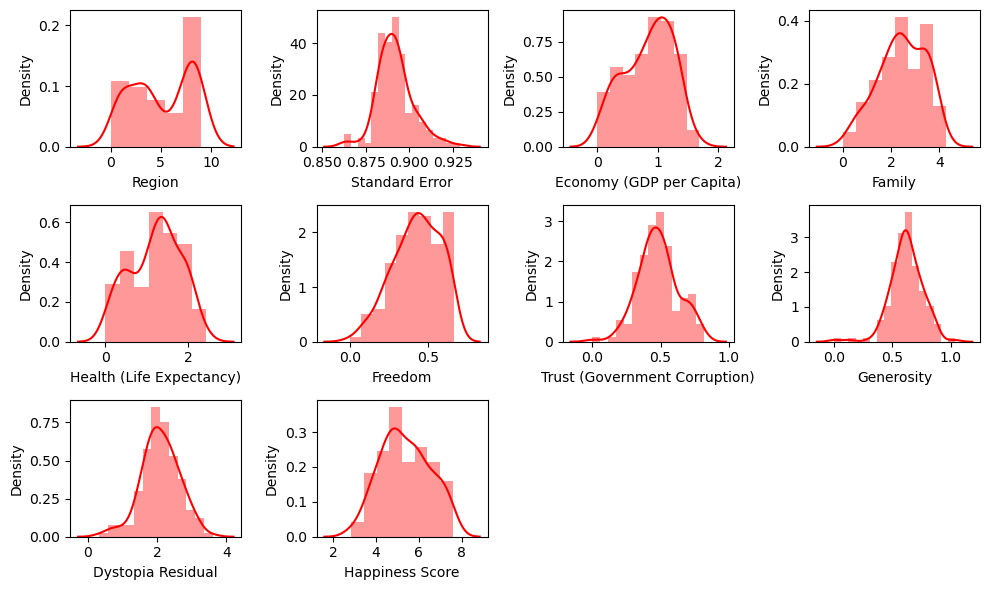

In [65]:
#To check skewness in df after transformation
plt.figure(figsize=(10,6))
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='r')
    plotnumber+=1
plt.tight_layout()    

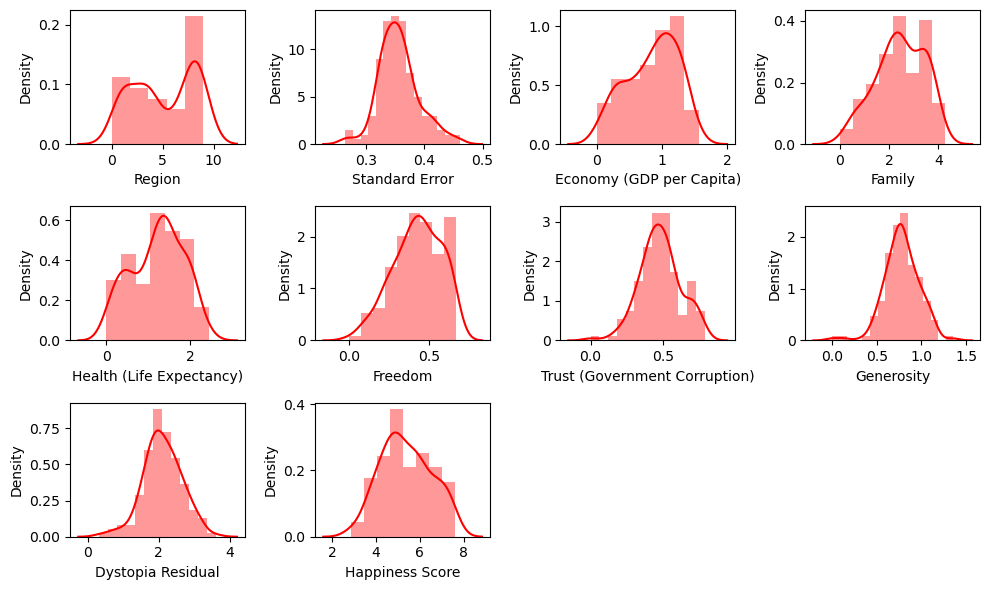

In [66]:
#To check skewness in df1 after transformation
plt.figure(figsize=(10,6))
plotnumber=1
for col in df1:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[col],color='r')
    plotnumber+=1
plt.tight_layout()    

CORRELATION

In [67]:
dfcor=df.corr()
dfcor

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Region,1.000000,-0.060980,-0.260139,-0.142319,-0.291307,0.092567,0.213506,0.271219,-0.057276,-0.176791
Standard Error,-0.060980,1.000000,-0.223664,-0.170200,-0.319847,-0.170392,-0.156032,-0.074254,0.053720,-0.209485
Economy (GDP per Capita),-0.260139,-0.223664,1.000000,0.661658,0.838016,0.370300,0.205482,-0.052873,0.040059,0.780966
Family,-0.142319,-0.170200,0.661658,1.000000,0.576634,0.492232,0.166088,0.103161,0.168728,0.770142
Health (Life Expectancy),-0.291307,-0.319847,0.838016,0.576634,1.000000,0.381742,0.177714,0.069266,0.035792,0.749442
Freedom,0.092567,-0.170392,0.370300,0.492232,0.381742,1.000000,0.461105,0.397977,0.062783,0.568211
Trust (Government Corruption),0.213506,-0.156032,0.205482,0.166088,0.177714,0.461105,1.000000,0.265354,0.010769,0.326229
Generosity,0.271219,-0.074254,-0.052873,0.103161,0.069266,0.397977,0.265354,1.000000,-0.068397,0.163290
Dystopia Residual,-0.057276,0.053720,0.040059,0.168728,0.035792,0.062783,0.010769,-0.068397,1.000000,0.530474
Happiness Score,-0.176791,-0.209485,0.780966,0.770142,0.749442,0.568211,0.326229,0.163290,0.530474,1.000000


<Axes: >

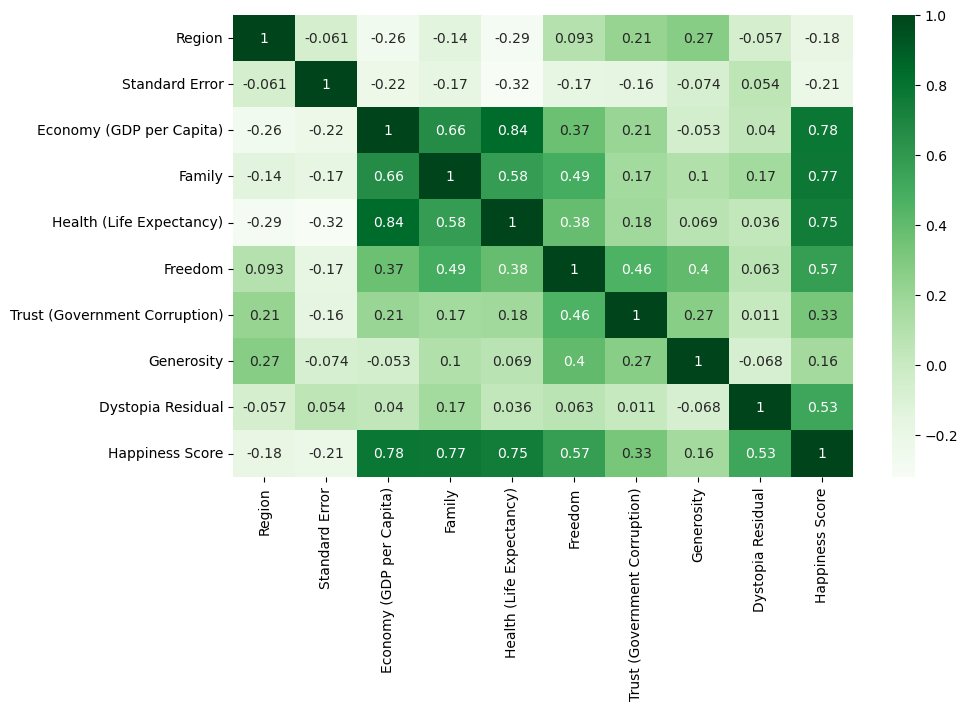

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Greens',annot=True)

In [69]:
df1cor=df1.corr()
df1cor

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Region,1.000000,-0.031738,-0.241266,-0.127122,-0.282420,0.103938,0.206492,0.284261,-0.050095,-0.159313
Standard Error,-0.031738,1.000000,-0.264928,-0.212528,-0.350169,-0.203038,-0.095459,-0.101955,0.018446,-0.261606
Economy (GDP per Capita),-0.241266,-0.264928,1.000000,0.664331,0.845044,0.365128,0.219851,-0.062834,0.044001,0.778284
Family,-0.127122,-0.212528,0.664331,1.000000,0.573786,0.497725,0.197820,0.104606,0.165145,0.768981
Health (Life Expectancy),-0.282420,-0.350169,0.845044,0.573786,1.000000,0.385922,0.187290,0.076048,0.035381,0.749135
Freedom,0.103938,-0.203038,0.365128,0.497725,0.385922,1.000000,0.466789,0.395941,0.098587,0.579799
Trust (Government Corruption),0.206492,-0.095459,0.219851,0.197820,0.187290,0.466789,1.000000,0.275032,0.080578,0.367597
Generosity,0.284261,-0.101955,-0.062834,0.104606,0.076048,0.395941,0.275032,1.000000,-0.069726,0.163060
Dystopia Residual,-0.050095,0.018446,0.044001,0.165145,0.035381,0.098587,0.080578,-0.069726,1.000000,0.537865
Happiness Score,-0.159313,-0.261606,0.778284,0.768981,0.749135,0.579799,0.367597,0.163060,0.537865,1.000000


<Axes: >

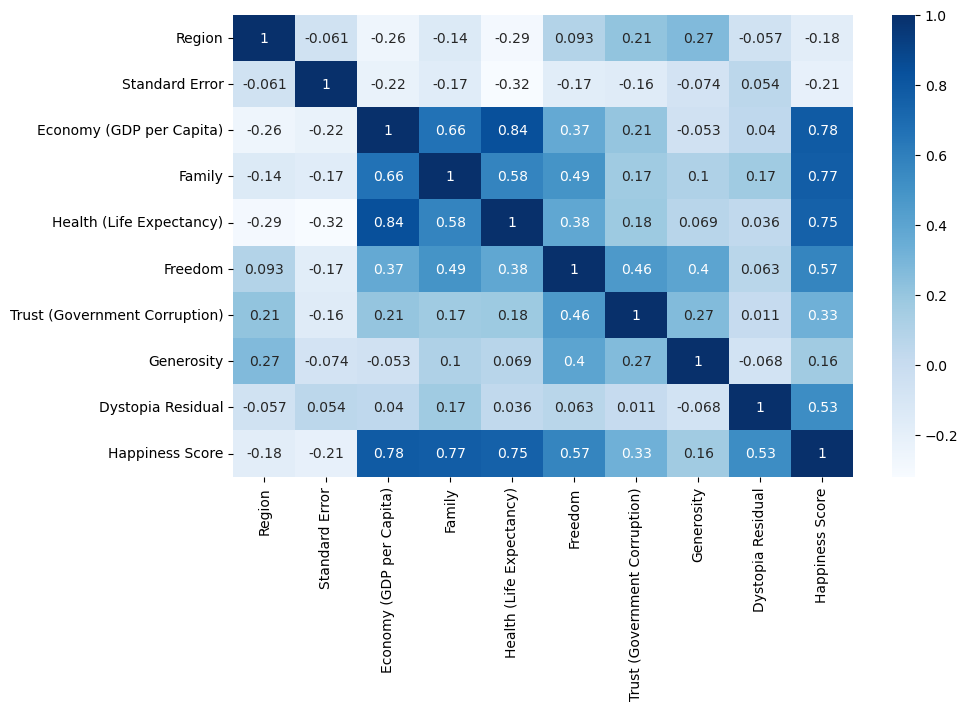

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Here we can see the correlation between various columns
Happiness Score has high positive correlation with Economy, Family and Health.
Health is highly positively correlated to Economy
Family is positively correlated to Economy
Family is positively correlated to Family


In [71]:
dfcor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.770142
Health (Life Expectancy)         0.749442
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.326229
Generosity                       0.163290
Region                          -0.176791
Standard Error                  -0.209485
Name: Happiness Score, dtype: float64

In [72]:
df1cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.778284
Family                           0.768981
Health (Life Expectancy)         0.749135
Freedom                          0.579799
Dystopia Residual                0.537865
Trust (Government Corruption)    0.367597
Generosity                       0.163060
Region                          -0.159313
Standard Error                  -0.261606
Name: Happiness Score, dtype: float64

In [73]:
#Now separating dependent and independent variables
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [74]:
#Now separating dependent and independent variables
x1=df1.drop('Happiness Score',axis=1)
y1=df1['Happiness Score']

In [75]:
print(x.shape)
print(y.shape)

(158, 9)
(158,)


In [76]:
print(x1.shape)
print(y1.shape)

(153, 9)
(153,)


In [77]:
#now we will scale x and x1
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,-0.913659,1.369621,1.596208,1.483664,1.577438,1.826993,0.562169,0.758258
1,1.300256,0.223196,1.135226,1.902265,1.523647,1.332456,0.260958,1.374101,1.092857
2,1.300256,-0.991125,1.192861,1.659349,1.082553,1.469659,2.075620,0.839496,0.712335
3,1.300256,-0.507382,1.525130,1.491674,1.144169,1.605131,1.592625,0.872960,0.663893
4,-0.040302,-0.785244,1.194876,1.445239,1.265175,1.360416,1.428028,1.488624,0.639337
...,...,...,...,...,...,...,...,...,...
153,0.965117,-0.865138,-1.552987,-0.936978,-0.936435,1.087740,2.318782,0.074479,-2.588925
154,0.965117,-0.695154,-1.392303,-1.999160,-1.277652,0.372033,-0.357762,-0.270987,-0.843967
155,-0.375441,0.307625,-0.455245,-1.750016,0.267506,-1.809238,0.624780,1.559131,-3.208430
156,0.965117,2.067984,-2.067566,-1.876835,-1.531489,-2.064472,-0.123602,-0.150256,-0.481985


In [78]:
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.292765,-0.931210,1.395383,1.581538,1.462838,1.597237,1.899572,0.573939,0.758704
1,1.292765,0.271122,1.155940,1.885169,1.502542,1.352141,0.275955,1.394244,1.098281
2,1.292765,-1.008565,1.214816,1.644178,1.064520,1.489408,2.157340,0.854958,0.712098
3,1.292765,-0.516148,1.554241,1.477831,1.125707,1.624944,1.656586,0.888823,0.662936
4,-0.039175,-0.801726,1.216875,1.431765,1.245870,1.380114,1.485937,1.509183,0.638014
...,...,...,...,...,...,...,...,...,...
148,0.626795,-1.243695,-1.341700,-2.077187,-1.323604,-1.276185,-0.160863,0.996406,-0.280973
149,0.959780,-0.709949,-1.426023,-1.985344,-1.279249,0.391270,-0.365515,-0.270734,-0.867355
150,-0.372160,0.365606,-0.468784,-1.738174,0.255149,-1.791020,0.653155,1.579824,-3.266993
151,0.959780,2.512897,-2.115829,-1.863989,-1.531319,-2.046374,-0.122745,-0.148613,-0.499988


In [79]:
#Checking VIF for x
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Region,1.297940
1,Standard Error,1.167609
2,Economy (GDP per Capita),4.465668
3,Family,2.151601
4,Health (Life Expectancy),3.978657
5,Freedom,1.875576
6,Trust (Government Corruption),1.375003
7,Generosity,1.394228
8,Dystopia Residual,1.058337


In [80]:
#Checking VIF for x1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,Region,1.295008
1,Standard Error,1.174116
2,Economy (GDP per Capita),4.815042
3,Family,2.168938
4,Health (Life Expectancy),4.232457
5,Freedom,1.877054
6,Trust (Government Corruption),1.380833
7,Generosity,1.444877
8,Dystopia Residual,1.063549


To remove colinearity, we will remove column Health as Economy has better positive correlation with Happiness Score

In [81]:
x.drop("Health (Life Expectancy)",axis=1,inplace=True)

In [82]:
x1.drop("Health (Life Expectancy)",axis=1,inplace=True)

In [83]:
x1

,Region,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.292765,-0.931210,1.395383,1.581538,1.597237,1.899572,0.573939,0.758704
1,1.292765,0.271122,1.155940,1.885169,1.352141,0.275955,1.394244,1.098281
2,1.292765,-1.008565,1.214816,1.644178,1.489408,2.157340,0.854958,0.712098
3,1.292765,-0.516148,1.554241,1.477831,1.624944,1.656586,0.888823,0.662936
4,-0.039175,-0.801726,1.216875,1.431765,1.380114,1.485937,1.509183,0.638014
...,...,...,...,...,...,...,...,...
148,0.626795,-1.243695,-1.341700,-2.077187,-1.276185,-0.160863,0.996406,-0.280973
149,0.959780,-0.709949,-1.426023,-1.985344,0.391270,-0.365515,-0.270734,-0.867355
150,-0.372160,0.365606,-0.468784,-1.738174,-1.791020,0.653155,1.579824,-3.266993
151,0.959780,2.512897,-2.115829,-1.863989,-2.046374,-0.122745,-0.148613,-0.499988


In [84]:
x1

,Region,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.292765,-0.931210,1.395383,1.581538,1.597237,1.899572,0.573939,0.758704
1,1.292765,0.271122,1.155940,1.885169,1.352141,0.275955,1.394244,1.098281
2,1.292765,-1.008565,1.214816,1.644178,1.489408,2.157340,0.854958,0.712098
3,1.292765,-0.516148,1.554241,1.477831,1.624944,1.656586,0.888823,0.662936
4,-0.039175,-0.801726,1.216875,1.431765,1.380114,1.485937,1.509183,0.638014
...,...,...,...,...,...,...,...,...
148,0.626795,-1.243695,-1.341700,-2.077187,-1.276185,-0.160863,0.996406,-0.280973
149,0.959780,-0.709949,-1.426023,-1.985344,0.391270,-0.365515,-0.270734,-0.867355
150,-0.372160,0.365606,-0.468784,-1.738174,-1.791020,0.653155,1.579824,-3.266993
151,0.959780,2.512897,-2.115829,-1.863989,-2.046374,-0.122745,-0.148613,-0.499988


In [85]:
#Again checking VIF
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,Region,1.213380
1,Standard Error,1.104569
2,Economy (GDP per Capita),2.113339
3,Family,2.161273
4,Freedom,1.861009
5,Trust (Government Corruption),1.376477
6,Generosity,1.359308
7,Dystopia Residual,1.063199


In [86]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Region,1.228191
1,Standard Error,1.084491
2,Economy (GDP per Capita),2.083581
3,Family,2.150650
4,Freedom,1.863736
5,Trust (Government Corruption),1.371102
6,Generosity,1.332620
7,Dystopia Residual,1.057664


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [88]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [89]:
x1=df1.drop('Happiness Score',axis=1)
y1=df1['Happiness Score']

In [90]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)

Maximum r2 score is  0.9972382806879676 at random state  35


In [91]:
#Now we find the best random state with x and y
maxRS1=0
maxaccu1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    acc1=r2_score(y1_test,pred)
    if acc1>maxaccu1:
        maxaccu1=acc1
        maxRS1=i
print("Maximum r2 score is ",maxaccu1, "at random state ",maxRS1)

Maximum r2 score is  0.9974756076993414 at random state  42


Since r2 score is better with x1 and y1 we will procees with df1

In [92]:
LR=LinearRegression()
LR.fit(x1_train,y1_train)
pred_LR=LR.predict(x1_test)
pred_train=LR.predict(x1_train)
print(LR)
print("R2_Score : ",r2_score(y1_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_LR)) )

LinearRegression()
R2_Score :  0.9940247416778764
R2_Score on Training Data : 0.9948642552562773
Mean Absolute Error: 0.05421764843828544
Mean Squared Error: 0.0058733484502921365
Root Mean Squared Error: 0.07663777430413893


In [93]:
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)
pred_RFR=RFR.predict(x1_test)
pred_train=RFR.predict(x1_train)
print(RFR)
print("R2_Score : ",r2_score(y1_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.8406703504104988
R2_Score on Training Data : 0.9831644733435277
Mean Absolute Error: 0.2970639130434787
Mean Squared Error: 0.15661223332173926
Root Mean Squared Error: 0.3957426352084638


In [94]:
KNR=KNeighborsRegressor()
KNR.fit(x1_train,y1_train)
pred_KNR=KNR.predict(x1_test)
pred_train=KNR.predict(x1_train)
print(KNR)
print("R2_Score : ",r2_score(y1_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_KNR)) )

KNeighborsRegressor()
R2_Score :  0.7818566855117425
R2_Score on Training Data : 0.8988132292675615
Mean Absolute Error: 0.3572130434782611
Mean Squared Error: 0.21442281304347827
Root Mean Squared Error: 0.46305810979128553


In [95]:
GBR=GradientBoostingRegressor()
GBR.fit(x1_train,y1_train)
pred_GBR=GBR.predict(x1_test)
pred_train=GBR.predict(x1_train)
print(GBR)
print("R2_Score : ",r2_score(y1_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.9160721247300471
R2_Score on Training Data : 0.9994839419871483
Mean Absolute Error: 0.21995015918056957
Mean Squared Error: 0.08249645949664985
Root Mean Squared Error: 0.28722196903553504


In [96]:
svr=SVR()
svr.fit(x1_train,y1_train)
pred_svr=svr.predict(x1_test)
pred_train=svr.predict(x1_train)
print(svr)
print("R2_Score : ",r2_score(y1_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_svr)) )

SVR()
R2_Score :  0.9313397320400421
R2_Score on Training Data : 0.9517222522636986
Mean Absolute Error: 0.2119784821081689
Mean Squared Error: 0.06748924593371244
Root Mean Squared Error: 0.25978692410071846


In [97]:
lasso=Lasso()
lasso.fit(x1_train,y1_train)
pred_lasso=lasso.predict(x1_test)
pred_train=lasso.predict(x1_train)
print(lasso)
print("R2_Score : ",r2_score(y1_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_lasso)) )


Lasso()
R2_Score :  -0.03831761853279381
R2_Score on Training Data : 0.027579883094311364
Mean Absolute Error: 0.8541721196567574
Mean Squared Error: 1.0206087916134203
Root Mean Squared Error: 1.0102518456372254


In [98]:
ridge=Ridge()
ridge.fit(x1_train,y1_train)
pred_ridge=ridge.predict(x1_test)
pred_train=ridge.predict(x1_train)
print(ridge)
print("R2_Score : ",r2_score(y1_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ridge)) )


Ridge()
R2_Score :  0.9873148961617177
R2_Score on Training Data : 0.9919516800804915
Mean Absolute Error: 0.08644899116871878
Mean Squared Error: 0.012468755483677726
Root Mean Squared Error: 0.11166358172509838


In [99]:
EN=ElasticNet()
EN.fit(x1_train,y1_train)
pred_EN=EN.predict(x1_test)
pred_train=EN.predict(x1_train)
print(EN)
print("R2_Score : ",r2_score(y1_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_EN)) )


ElasticNet()
R2_Score :  0.2004159082914848
R2_Score on Training Data : 0.3935326436296872
Mean Absolute Error: 0.737693697084488
Mean Squared Error: 0.7859469386497441
Root Mean Squared Error: 0.8865364846692685


In [100]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print(dtr)
print("R2_Score : ",r2_score(y1_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_dtr)) )


DecisionTreeRegressor()
R2_Score :  0.6866537616142807
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.4215434782608695
Mean Squared Error: 0.30800202173913044
Root Mean Squared Error: 0.5549792984779977


In [101]:
ad=AdaBoostRegressor()
ad.fit(x1_train,y1_train)
pred_ad=ad.predict(x1_test)
pred_train=ad.predict(x1_train)
print(ad)
print("R2_Score : ",r2_score(y1_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.7150872735653159
R2_Score on Training Data : 0.9556042568693005
Mean Absolute Error: 0.41787827109810644
Mean Squared Error: 0.2800534520955969
Root Mean Squared Error: 0.529200767285533


In [102]:
br=BaggingRegressor()
br.fit(x1_train,y1_train)
pred_br=br.predict(x1_test)
pred_train=br.predict(x1_train)
print(br)
print("R2_Score : ",r2_score(y1_test,pred_br))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_br)))

BaggingRegressor()
R2_Score :  0.7889129532009851
R2_Score on Training Data : 0.9729483133369026
Mean Absolute Error: 0.335604347826087
Mean Squared Error: 0.2074868921739132
Root Mean Squared Error: 0.4555072910216841


In [103]:
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_train=etr.predict(x1_train)
print(etr)
print("R2_Score : ",r2_score(y1_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.8583761353986957
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.281393478260869
Mean Squared Error: 0.13920842595217373
Root Mean Squared Error: 0.3731064539138578


As we can see that Linear Regression gives the highest r2 score and least error
LinearRegression()
R2_Score :  0.9940247416778764
R2_Score on Training Data : 0.9948642552562773
Mean Absolute Error: 0.05421764843828544
Mean Squared Error: 0.0058733484502921365
Root Mean Squared Error: 0.07663777430413893

In [104]:
#Now we will check all models with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y1_test,pred_LR)-score_LR.mean())*100)

0.9940247416778764
[0.96187737 0.83319818 0.78946754 0.64662086 0.86686065]
0.8196049200575006
Difference between r2 score and Cross Val Score for Linear regression is : 17.441982162037572


In [105]:
score_RFR=cvs(RFR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y1_test,pred_RFR)-score_RFR.mean())*100)

0.8406703504104988
[-7.47214424 -1.19793711 -0.95870666 -1.70929609 -5.0645136 ]
-3.280519538635366
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 412.11898890458644


In [106]:
score_KNR=cvs(KNR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y1_test,pred_KNR)-score_KNR.mean())*100)

0.7818566855117425
[-11.80274586  -4.1522698   -5.28493311 -10.96503159  -4.23725047]
-7.288446164974277
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : 807.030285048602


In [107]:
score_GBR=cvs(GBR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y1_test,pred_GBR)-score_GBR.mean())*100)

0.9160721247300471
[-3.82788843 -0.93738355 -1.898099   -1.66435087 -3.46408547]
-2.3583614654449563
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 327.4433590175003


In [108]:
score_svr=cvs(svr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y1_test,pred_svr)-score_svr.mean())*100)

0.9313397320400421
[-4.36531011  0.28026448  0.14240242 -1.57751788 -0.60261578]
-1.2245553758221404
Difference between r2 score and Cross Val Score for SVR is : 215.58951078621823


In [109]:
score_lasso=cvs(lasso,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y1_test,pred_lasso)-score_lasso.mean())*100)

-0.03831761853279381
[-41.62772363 -12.3733931   -0.36670425 -29.97824564 -23.22576687]
-21.51436669785036
Difference between r2 score and Cross Val Score for Lasso is : 2147.6049079317568


In [110]:
score_ridge=cvs(ridge,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y1_test,pred_ridge)-score_ridge.mean())*100)

0.9873148961617177
[0.74604095 0.68869945 0.78544291 0.66198826 0.85112963]
0.7466602397214143
Difference between r2 score and Cross Val Score for Ridge is : 24.065465644030347


In [111]:
score_EN=cvs(EN,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_EN))
print(score_EN)
print(score_EN.mean())
print("Difference between r2 score and Cross Val Score for ElasticNet is :", (r2_score(y1_test,pred_EN)-score_EN.mean())*100)

0.2004159082914848
[-44.12573476  -7.05262992  -0.60034608 -20.30235527 -21.63403176]
-18.74301955979775
Difference between r2 score and Cross Val Score for ElasticNet is : 1894.3435468089237


In [112]:
score_dtr=cvs(dtr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y1_test,pred_dtr)-score_dtr.mean())*100)

0.6866537616142807
[ -5.15452374  -8.85878945  -8.16798333 -10.0495296   -5.67467201]
-7.581099624679124
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 826.7753386293404


In [113]:
score_ad=cvs(ad,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y1_test,pred_ad)-score_ad.mean())*100)

0.7150872735653159
[-9.79586265 -7.75664487 -4.59204861 -5.67253809 -5.89321672]
-6.742062187692213
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 745.7149461257528


In [114]:
score_br=cvs(br,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y1_test,pred_br)-score_br.mean())*100)

0.7889129532009851
[-6.25829545 -3.75651958 -3.07103266 -3.39506252 -4.48343771]
-4.192869580767623
Difference between r2 score and Cross Val Score for BaggingRegressor is : 498.1782533968609


In [115]:
score_etr=cvs(etr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y1_test,pred_etr)-score_etr.mean())*100)

0.8583761353986957
[-7.28054644 -0.01755148 -1.43647126 -1.86880014 -4.59877459]
-3.040428781356334
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 389.880491675503


Observation:
Above we can clearly see that Linear Regression has highest r2 score as well as cross val score. Moreover, the difference between nboth the scores is also less. Hence we can say that Linear Regression is our best model.
r2 Score=0.9940247416778764
[0.96187737 0.83319818 0.78946754 0.64662086 0.86686065]
CV Score=0.8196049200575006
Difference between r2 score and Cross Val Score for Linear regression is : 17.441982162037572

HYPERPARAMETER TUNING

In [117]:
from sklearn.model_selection import GridSearchCV

In [138]:
params={"n_jobs":[-1,1,2,5,20,50]}

In [139]:
GCV=GridSearchCV(LR,params,cv=5)

In [140]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [-1, 1, 2, 5, 20, 50]})

In [141]:
GCV.best_params_

{'n_jobs': -1}

In [142]:
Final_model=LinearRegression(n_jobs=-1)
Final_model.fit(x1_train,y1_train)
finalpred=Final_model.predict(x1_test)
print("R2_Score : ",r2_score(y1_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y1_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y1_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,finalpred)))

R2_Score :  0.9940247416778764
Mean Absolute Error: 0.05421764843828544
Mean Squared Error: 0.0058733484502921365
Root Mean Squared Error: 0.07663777430413893


SAVING BEST MODEL

In [143]:
import joblib
import pickle
filename='World Happiness Report Project.pkl'
pickle.dump(Final_model,open(filename,'wb'))
loaded_model=pickle.load(open('World Happiness Report Project.pkl','rb'))
result=loaded_model.score(x1_test,y1_test)
print(result*100)


99.40247416778763


In [144]:
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],y1_test[:]],index=["Predicted","Original"])

In [145]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Predicted,3.595624,4.502837,5.188952,5.949333,7.439824,4.247931,5.789007,6.748436,5.116783,5.178148,...,5.144152,7.2678,4.555424,5.745157,6.317916,5.126889,5.80434,3.896072,5.157587,4.73196
Original,3.587000,4.550000,5.194000,5.960000,7.527000,4.252000,5.824000,6.853000,5.102000,5.192000,...,5.140000,7.2260,4.517000,5.754000,6.411000,5.123000,5.88900,3.956000,5.098000,4.73900


We can see that our predicted score is very close to the original score

In [ ]:
#FINISH